# Task # 2 - More advanced Python + Obspy

Welcome to the first laboratory task of observational seismology. In this set of laboratories, we will learn the skills of modern observational seismology via the Python/Obspy workflow. Today, you will implement a basic seismological workflow; downloading, selecting, processing and plotting seismic waveforms.

## Importing modules

The basic Python language contains only the tools necessary to construct programs, and little in the way of scientific computing infrastructure. When we want to have access to some additional software, we need to import it (compare against Matlab, where everything is accessible at once).

In [1]:
#We can import the obspy module, and give it a shorter name (PS as you can see, the # symbol starts a comment)
import obspy as op #note we can start a comment after a line that has executable code on it.
#matplotlib is a large plotting package, with a submodule pyplot that we can import by itself like this
import matplotlib.pyplot as plt 
#normally plots open in their own window, but we want a nice cohesive document - we can set inline plots by using
#the %matplotlib magic command (a magic command is not part of standard python, but instead a directive to the ipython
#shell that runs under the hood of Jupyter, that automatically configures matplotlib correctly). 
%matplotlib inline 

In [2]:
#Another useful magic command is %timeit, which runs tests to see how long it takes a particular statement to execute
#for example:
%timeit 1+1
#will tell us how long it takes Python to add two integers on your computer (not very long!).
#These magic commands will cause an error if you include them in a normal Python script, but they are very useful for
#Jupyter notebooks and IPython sessions. 

10000000 loops, best of 3: 33.3 ns per loop


One of the key cornerstones of the scientific Python platform is Numpy, which is a highly optimized library for multidimensional arrays. It allows us to perform vectorized operations, which is not a standard feature of Python. In the next section, there will be a lot of information, but the key thing to keep in focus is that Numpy allows us to operate on arrays. 

In [16]:
import numpy as np #it is tradition to import numpy as np
import math #math is the basic python math library - it does not allow vector operations

#Square brackets create a list in Python
a_list = [1, 2, 3, 4] 
#We can turn it into an array like so
a_numpy_array = np.array(a_list) 
#We can also specify an array manually:
an_identity_array = np.array([[1, 0], [0, 1]])
#Parentheses create a tuple, which is an immutable data structure - useful for data we don't want to change 
dims = (2, 4)
#Numpy has lots of matrix creation functionality - for instance, lets create a random matrix with dimensions
#given by dims. The documentation for numpy random normal is at
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html - give this a look!
a_random_2d_array = np.random.normal(1, 1, dims) 
#Double quotes denote a string - textual information. We can use format statements like below to inject variables 
#into strings.
print("A list: {0}".format(a_list))
print("An array: {0}".format(a_numpy_array))
print("An identity array: \n {0}".format(an_identity_array))
#note we have used a newline character \n to force the array onto a new line to make the printing nicer.
print("A random matrix: \n{0}".format(a_random_2d_array)) 

A list: [1, 2, 3, 4]
An array: [1 2 3 4]
An identity array: 
 [[1 0]
 [0 1]]
A random matrix: 
[[-0.08086131  1.12298206  1.63316869  1.27097869]
 [-0.78267859  1.11862667  2.45120483  3.04767698]]


We can index Numpy arrays by slicing them, allowing us to extract and reassign elements at will. When slicing, a colon represents a range. The details of slicing are extensive, and you can review them at https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [21]:
soon_to_be_not_an_identity_array = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
#set the last column (index 2) to 5
soon_to_be_not_an_identity_array[:, 2] = 5
print("Our new array is \n{0}".format(soon_to_be_not_an_identity_array))

Our new array is 
[[1 0 5]
 [0 1 5]
 [0 0 5]]


Numpy arrays, unlike lists, allow us to operate apply mathematical operations to all of their elements without writing loops. 

In [4]:
#try clauses allow us a way to use code that may or may not work and deal with any errors they cause
try: 
    cos_a_list = math.cos(a_list)
    print("cos of the list {0} = {1}".format(a_list, cos_a_list))
#we can catch a specific type of error as so - in this case, only TypeErrors will be handled, and anything else will
#crash the code; for more info see https://docs.python.org/3.5/tutorial/errors.html
except TypeError as e:
    print("The math module doesn't operate on lists, only scalars!")
    print("The cause of the exception is: {0}".format(e))

try:
    cos_a_numpy_array = np.cos(a_numpy_array)
    print("cos of the array {0} = {1}".format(a_numpy_array, cos_a_numpy_array))
except TypeError as e:
    print("You won't see this message, as numpy operates on multidimensional arrays.")
    print("The cause of the exception is: {0}".format(e))

The math module doesn't operate on lists, only scalars!
The cause of the exception is: a float is required
cos of the array [1 2 3 4] = [ 0.54030231 -0.41614684 -0.9899925  -0.65364362]


It can be useful to think of 2d arrays as matricies, but numpy arrays can have as many dimensions as find useful

In [6]:
#in python 3.5 + , we can use the @ symbol to perform matrix multiplication between numpy arrays: 
#rank 1 arrays (like a_numpy_array) will be interpreted as either a row or column vector depending on context
#but if neither works, 
try:
    a_malformed_product = a_numpy_array @ a_random_2d_array
    print("Matrix product between a 4-element vector {0} and a 2x4 matrix {1} = {2}".format(a_numpy_array, 
                                                                                            a_random_2d_array, 
                                                                                            a_malformed_product))
except ValueError as e:
          print("Multiplying a 4-element vector and a 2x4 matrix is not a well defined operation")
          print("The cause of the exception is: {0}".format(e))

try:
    a_good_product = a_random_2d_array @ a_numpy_array
    print("Matrix product between a 2x4 matrix \n {1} \n and a 4-element vector {0} = {2}".format(a_numpy_array, 
                                                                                                  a_random_2d_array, 
                                                                                                  a_good_product))
except ValueError as e:
          print("You won't see this message, as we have performed a good matrix operation")
          print("The cause of the exception is: {0}".format(e))

Multiplying a 4-element vector and a 2x4 matrix is not a well defined operation
The cause of the exception is: shapes (4,) and (2,4) not aligned: 4 (dim 0) != 2 (dim 0)
Matrix product between a 2x4 matrix 
 [[ 1.46445659  1.27360776  2.09433387  0.66499887]
 [ 0.3129682   2.17554373  0.24360723  1.1553658 ]] 
 and a 4-element vector [1 2 3 4] = [ 12.9546692   10.01634053]


Since we have specified matplotlib to be inline, we can easily plot things as so: 

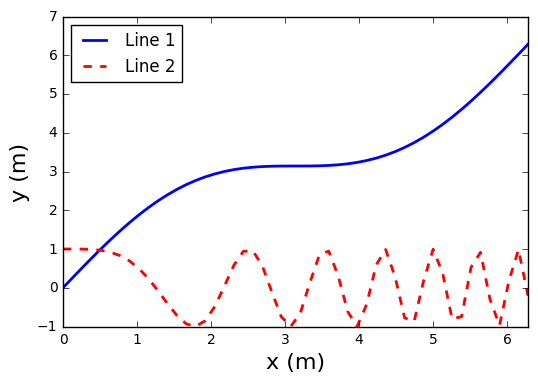

In [14]:
#linspace creates an array spanning an interval:
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)+x
#we can specify a label for a legend by using a keyword argument - these are 
plt.plot(x, y1, label='Line 1')
#two asterisks (**) is exponentiation in Python
y2 = np.cos(x**2) 
#we can specify particular formatting like so
plt.plot(x, y2, color='red', linestyle='dashed', label='Line 2')
#we can set the plot limits 
plt.xlim(0, 2*np.pi)
#if we have given our lines labels, as we have, we can easily add a legend
plt.legend(loc="upper left")
#and we can add labels
plt.xlabel("x (m)", fontsize=16)
plt.ylabel("y (m)", fontsize=16)

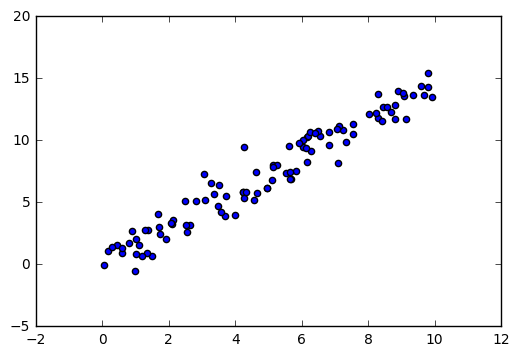

In [36]:
x = np.random.uniform(0,10,100)
y = 1.5*x + np.random.normal(0,1,100)
plt.scatter(x,y)

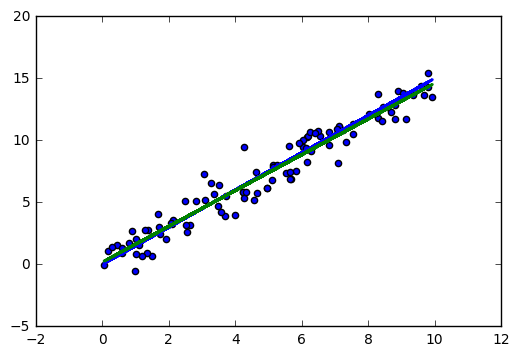

In [50]:
plt.scatter(x, y)
plt.plot(x, G_mat@np.array([0, 1.5]))
plt.plot(x, G_mat@np.linalg.inv(G_mat.T@G_mat)@G_mat.T@y)

In [38]:
G_mat.T @ y

array([    0.        ,  4760.92551137])

## Downloading & Processing Waveforms

Once we have identified an event of interest, we would naturally like some seismograms. Using the fdsn webservice through our IRIS client, we can download the data pertaining to our event. 

In [1]:
"""
Our catalogue possibly contains multiple events, each with possibly multiple origin solutions. 
Since we know our catalogue only has one event it must occupy index 0, and likewise we are interested in the
first origin solution. So we can get the event origin time by
"""
evt_st = maule_catalogue[0].origins[0].time
"""
Obtaining seismograms is similar to getting the catalogue; we specify the seismic network/station/location/channel, 
and start/end times. In this case, we are interested in CI.USC..BH(ENZ) channels - that is, the Southern California
Seismic Network (CI) permanent station at the University of Southern California (USC). 
We don't care about the "location" parameter as we know a priori that CI network stations don't have them, and
we want broadband high gain (BH) for all 3 components (we use the * wildcard to do this - alternatively 
we could manually write BHZ,BHN,BHE)
"""
seismograms = iris_client.get_waveforms(network = "CI", 
                                        station = "USC", 
                                        location = "", 
                                        channel = "BH*", 
                                        starttime = evt_st, 
                                        endtime = evt_st+3600)   

NameError: name 'maule_catalogue' is not defined

Lets plot the data to see what it looks like

In [ ]:
#If the data is very complex, it can be sometimes useful to make lines thinner so you can see finer details
seismograms.plot(linewidth=0.5)

### Task 1.2

Identify at what times the P-waves, S-waves, Love-waves and Rayleigh-waves arrive at USC. How do you know which is which? 

#### Your Answer:

##### Example good answer (of explanations):
- P-wave - arrives first
- S-wave - arrives second; lower frequency
- Love-wave - arrives third, very low frequency / not seen on vertical component
- Rayleigh-wave - arrives last, can see dispersion with low-frequency arriving first and frequency increasing with time. 

We can easily make plots of the seismograms at different frequencies by filtering them. To facilitate working with large datasets, Obspy does most of its processing in-place (this saves memory); however, we want to do lots of things with the data and only have a small dataset, so we should be careful to copy the data before operating on it. **If you accidentally process the original data, you must re-download it!** Let's look at the high frequency component.

In [ ]:
#Basically everything in Python is an object on which you can call methods; since these generally
#also return objects, we can call methods on those etc, allowing us to chain together operations like
#copying and filtering as shown below:
hf_seismograms = seismograms.copy().filter('bandpass', freqmin=0.5, freqmax=10)
hf_seismograms.plot(linewidth=0.5)

### Task 1.1

One of the 

## Introduction to obspy
